In [3]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import numpy as np # for getting our distribution
import seaborn as sns # for plotting
from scipy import stats # to compute statistics
import statsmodels.api as sm

In [4]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df = df.dropna()

1. Create a column with the total number of species present (species richness) in each sampling site.


In [5]:
list(df)


['Site_code',
 'Latitude',
 'Longitude',
 'Country',
 'Catchment_name',
 'Galiza',
 'Subsample',
 'Calib_EFI_Medit',
 'Calib_connect',
 'Calib_hydrol',
 'Calib_morphol',
 'Calib_wqual',
 'Geomorph1',
 'Geomorph2',
 'Geomorph3',
 'Water_source_type',
 'Flow_regime',
 'Altitude',
 'Geological_typology',
 'Actual_river_slope',
 'Natural_sediment',
 'Elevation_mean_catch',
 'prec_ann_catch',
 'temp_ann',
 'temp_jan',
 'temp_jul',
 'Barriers_catchment_down',
 'Barriers_river_segment_up',
 'Barriers_river_segment_down',
 'Barriers_number_river_segment_up',
 'Barriers_number_river_segment_down',
 'Barriers_distance_river_segment_up',
 'Barriers_distance_river_segment_down',
 'Impoundment',
 'Hydropeaking',
 'Water_abstraction',
 'Hydro_mod',
 'Temperature_impact',
 'Velocity_increase',
 'Reservoir_flushing',
 'Sedimentation',
 'Channelisation',
 'Cross_sec',
 'Instream_habitat',
 'Riparian_vegetation',
 'Embankment',
 'Floodprotection',
 'Floodplain',
 'Toxic_substances',
 'Acidification',
 '

In [6]:
df.columns.get_loc("Abramis brama")

56

In [7]:
sp_pres = df.columns[56:]
sp_pres

Index(['Abramis brama', 'Achondrostoma arcasii', 'Achondrostoma occidentale',
       'Achondrostoma oligolepis', 'Acipenser naccarii',
       'Alburnoides bipunctatus', 'Alburnus albidus', 'Alburnus alburnus',
       'Alosa alosa', 'Alosa fallax',
       ...
       'Squalius malacitanus', 'Squalius pyrenaicus', 'Squalius torgalensis',
       'Thymallus thymallus', 'Tinca tinca', 'Zingel asper', 'Squalius sp',
       'Barbatula sp', 'Phoxinus sp', 'Iberochondrostoma_sp'],
      dtype='object', length=108)

In [8]:
df['sp_rich'] = df[sp_pres].sum(axis=1)

2. Run a simple linear regression relating the species richness with each one of the continuous environmental variables in the dataset: Altitude, Actual_river_slope, Elevation_mean_catch, prec_ann_catch, temp_ann, temp_jan, temp_jul. Before running the analyses, check if any of the variables requires to be transformed and apply the appropriate transformation. Compute the regression coefficient estimates, the r-square and the F-statistics.

In [9]:
df_rich_env = df[["sp_rich", "Altitude", "Actual_river_slope","Elevation_mean_catch", "prec_ann_catch","temp_ann","temp_jan","temp_jul"]]
df_rich_env

,sp_rich,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
18,6,1179,0.001,1687.103217,810.092422,9.3,1.4,18.4
19,6,1038,2.258,1293.238318,650.030528,10.4,2.2,19.6
28,7,636,0.263,967.398405,513.949149,12.6,3.8,21.3
32,8,890,2.909,1088.329483,553.756064,11.2,2.7,20.5
43,7,872,3.530,985.273741,518.863081,11.1,2.6,20.0
...,...,...,...,...,...,...,...,...
5006,5,80,17.700,535.776632,1274.106711,14.9,8.6,20.5
5007,7,150,0.010,552.966008,1226.616143,15.0,7.7,20.9
5008,6,140,3.059,552.966008,1226.616143,15.0,7.9,20.9
5009,1,450,62.100,850.789660,1480.433598,12.9,6.8,19.5


<AxesSubplot: ylabel='Count'>

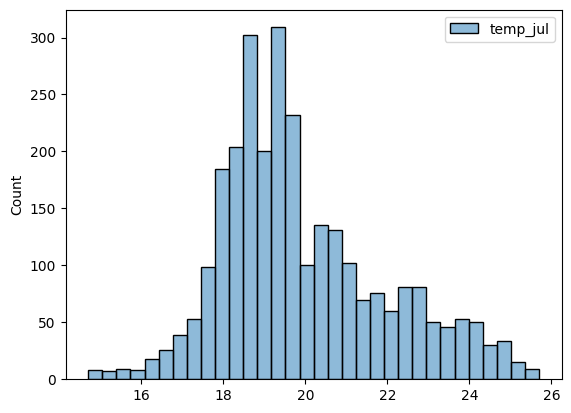

In [10]:
sns.histplot(data=df_rich_env[["temp_jul"]])

C:\Users\Miguel Paulo\AppData\Local\Temp\ipykernel_7860\3298767340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rich_env[['logActual_river_slope']] = np.log10(df_rich_env[['Actual_river_slope']]+1)


<AxesSubplot: ylabel='Count'>

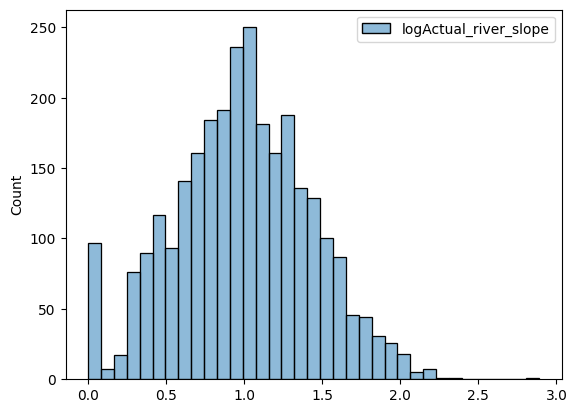

In [11]:
df_rich_env[['logActual_river_slope']] = np.log10(df_rich_env[['Actual_river_slope']]+1)
sns.histplot(data=df_rich_env[["logActual_river_slope"]])

In [12]:
import statsmodels.formula.api as smf

model_alt = smf.ols(formula='sp_rich ~ Altitude', data=df_rich_env).fit().summary()
model_slope = smf.ols(formula='sp_rich ~ logActual_river_slope', data=df_rich_env).fit().summary()
model_elev = smf.ols(formula='sp_rich ~ Elevation_mean_catch', data=df_rich_env).fit().summary()
model_prec = smf.ols(formula='sp_rich ~ prec_ann_catch', data=df_rich_env).fit().summary()
model_temp = smf.ols(formula='sp_rich ~ temp_ann', data=df_rich_env).fit().summary()
model_tempjan = smf.ols(formula='sp_rich ~ temp_jan', data=df_rich_env).fit().summary()
model_tempjul = smf.ols(formula='sp_rich ~ temp_jul', data=df_rich_env).fit().summary()

print(model_alt)
print(model_slope)
print(model_elev)
print(model_prec)
print(model_temp)
print(model_tempjan)
print(model_tempjul)

                            OLS Regression Results                            
Dep. Variable:                sp_rich   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     562.7
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          1.45e-113
Time:                        08:48:25   Log-Likelihood:                -6256.1
No. Observations:                2822   AIC:                         1.252e+04
Df Residuals:                    2820   BIC:                         1.253e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5929      0.065     70.854      0.0

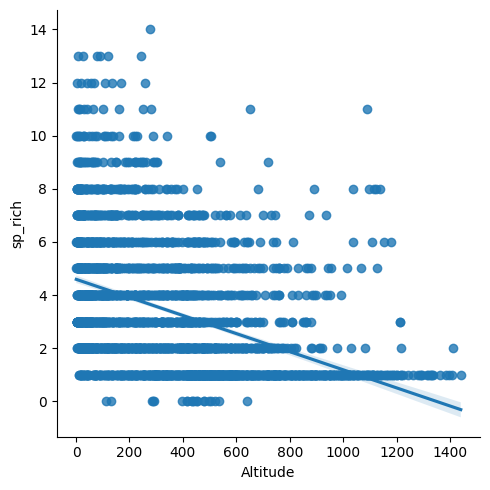

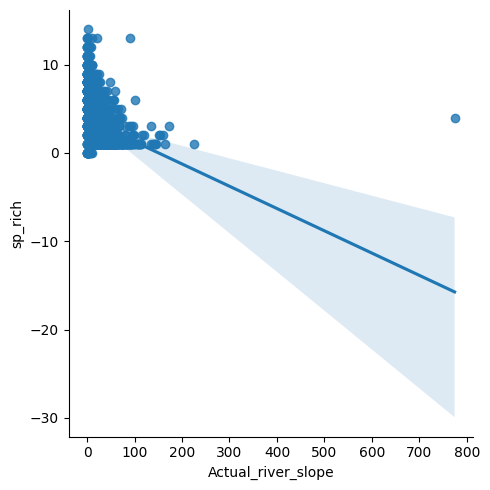

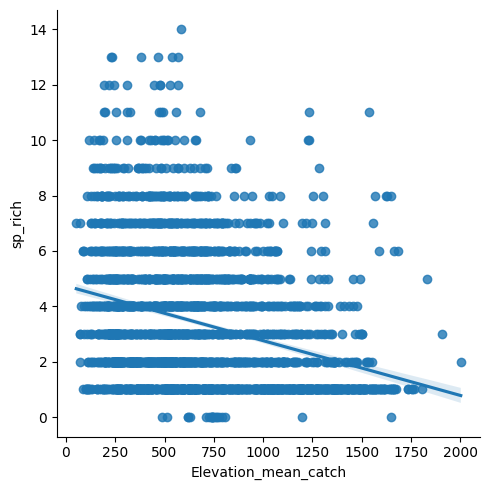

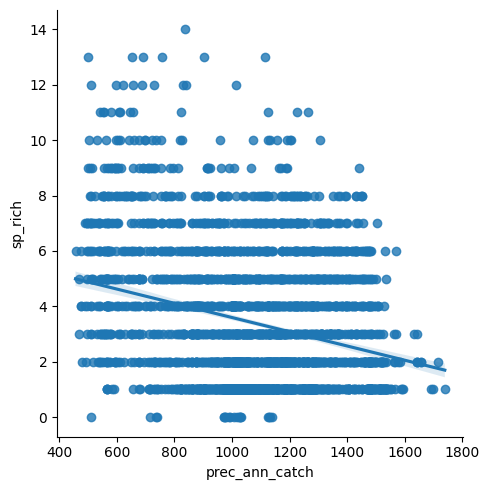

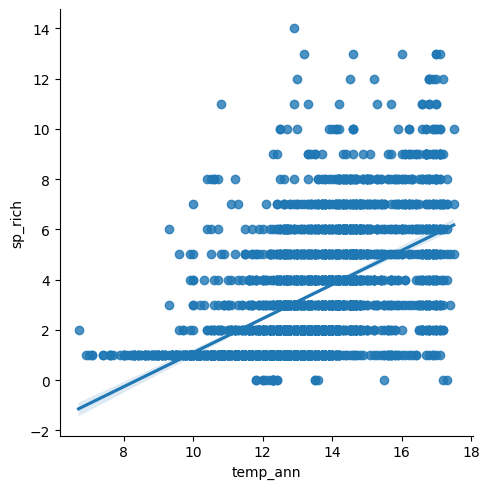

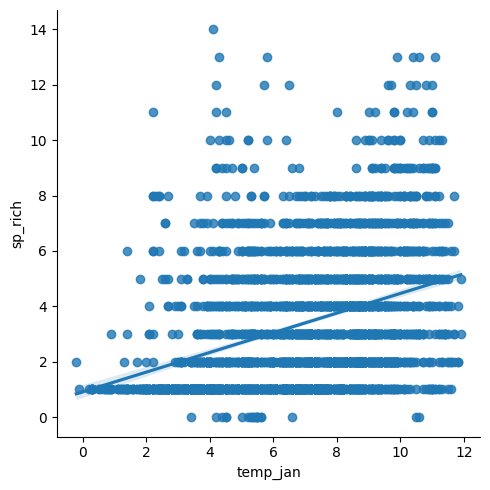

In [13]:
sns.lmplot(x='Altitude', y='sp_rich', data=df_rich_env)
sns.lmplot(x='Actual_river_slope', y='sp_rich', data=df_rich_env)
sns.lmplot(x='Elevation_mean_catch', y='sp_rich', data=df_rich_env)
sns.lmplot(x='prec_ann_catch', y='sp_rich', data=df_rich_env)
sns.lmplot(x='temp_ann', y='sp_rich', data=df_rich_env)
sns.lmplot(x='temp_jan', y='sp_rich', data=df_rich_env)

3. Now try to run a multiple linear regression with the same data and check the differences between the previous univariate regression coefficients and the new coefficients.

In [18]:
df = df.fillna(df.mean())

y=df["sp_rich"]
x=df[["Altitude", "Actual_river_slope","Elevation_mean_catch", "prec_ann_catch","temp_ann","temp_jan","temp_jul"]]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

C:\Users\Miguel Paulo\AppData\Local\Temp\ipykernel_7860\3774302528.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


                            OLS Regression Results                            
Dep. Variable:                sp_rich   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     247.3
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          2.30e-287
Time:                        09:02:26   Log-Likelihood:                -5836.4
No. Observations:                2822   AIC:                         1.169e+04
Df Residuals:                    2814   BIC:                         1.174e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.0384 

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


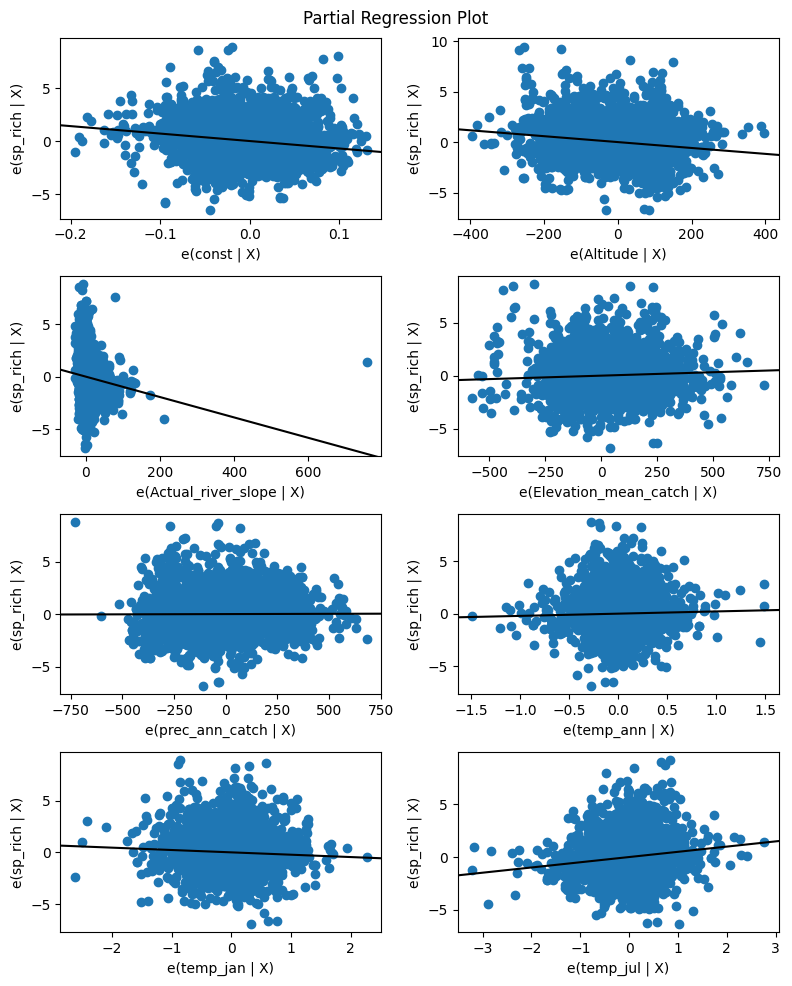

In [19]:
fig = plt.figure(figsize=(8, 10))
sm.graphics.plot_partregress_grid(model, fig=fig)
fig.tight_layout(pad=1.0)
plt.show()

4. Check the multicolinearity among the predictor variables and run a second more parsimonious regression model. Check how the coefficients have changed.

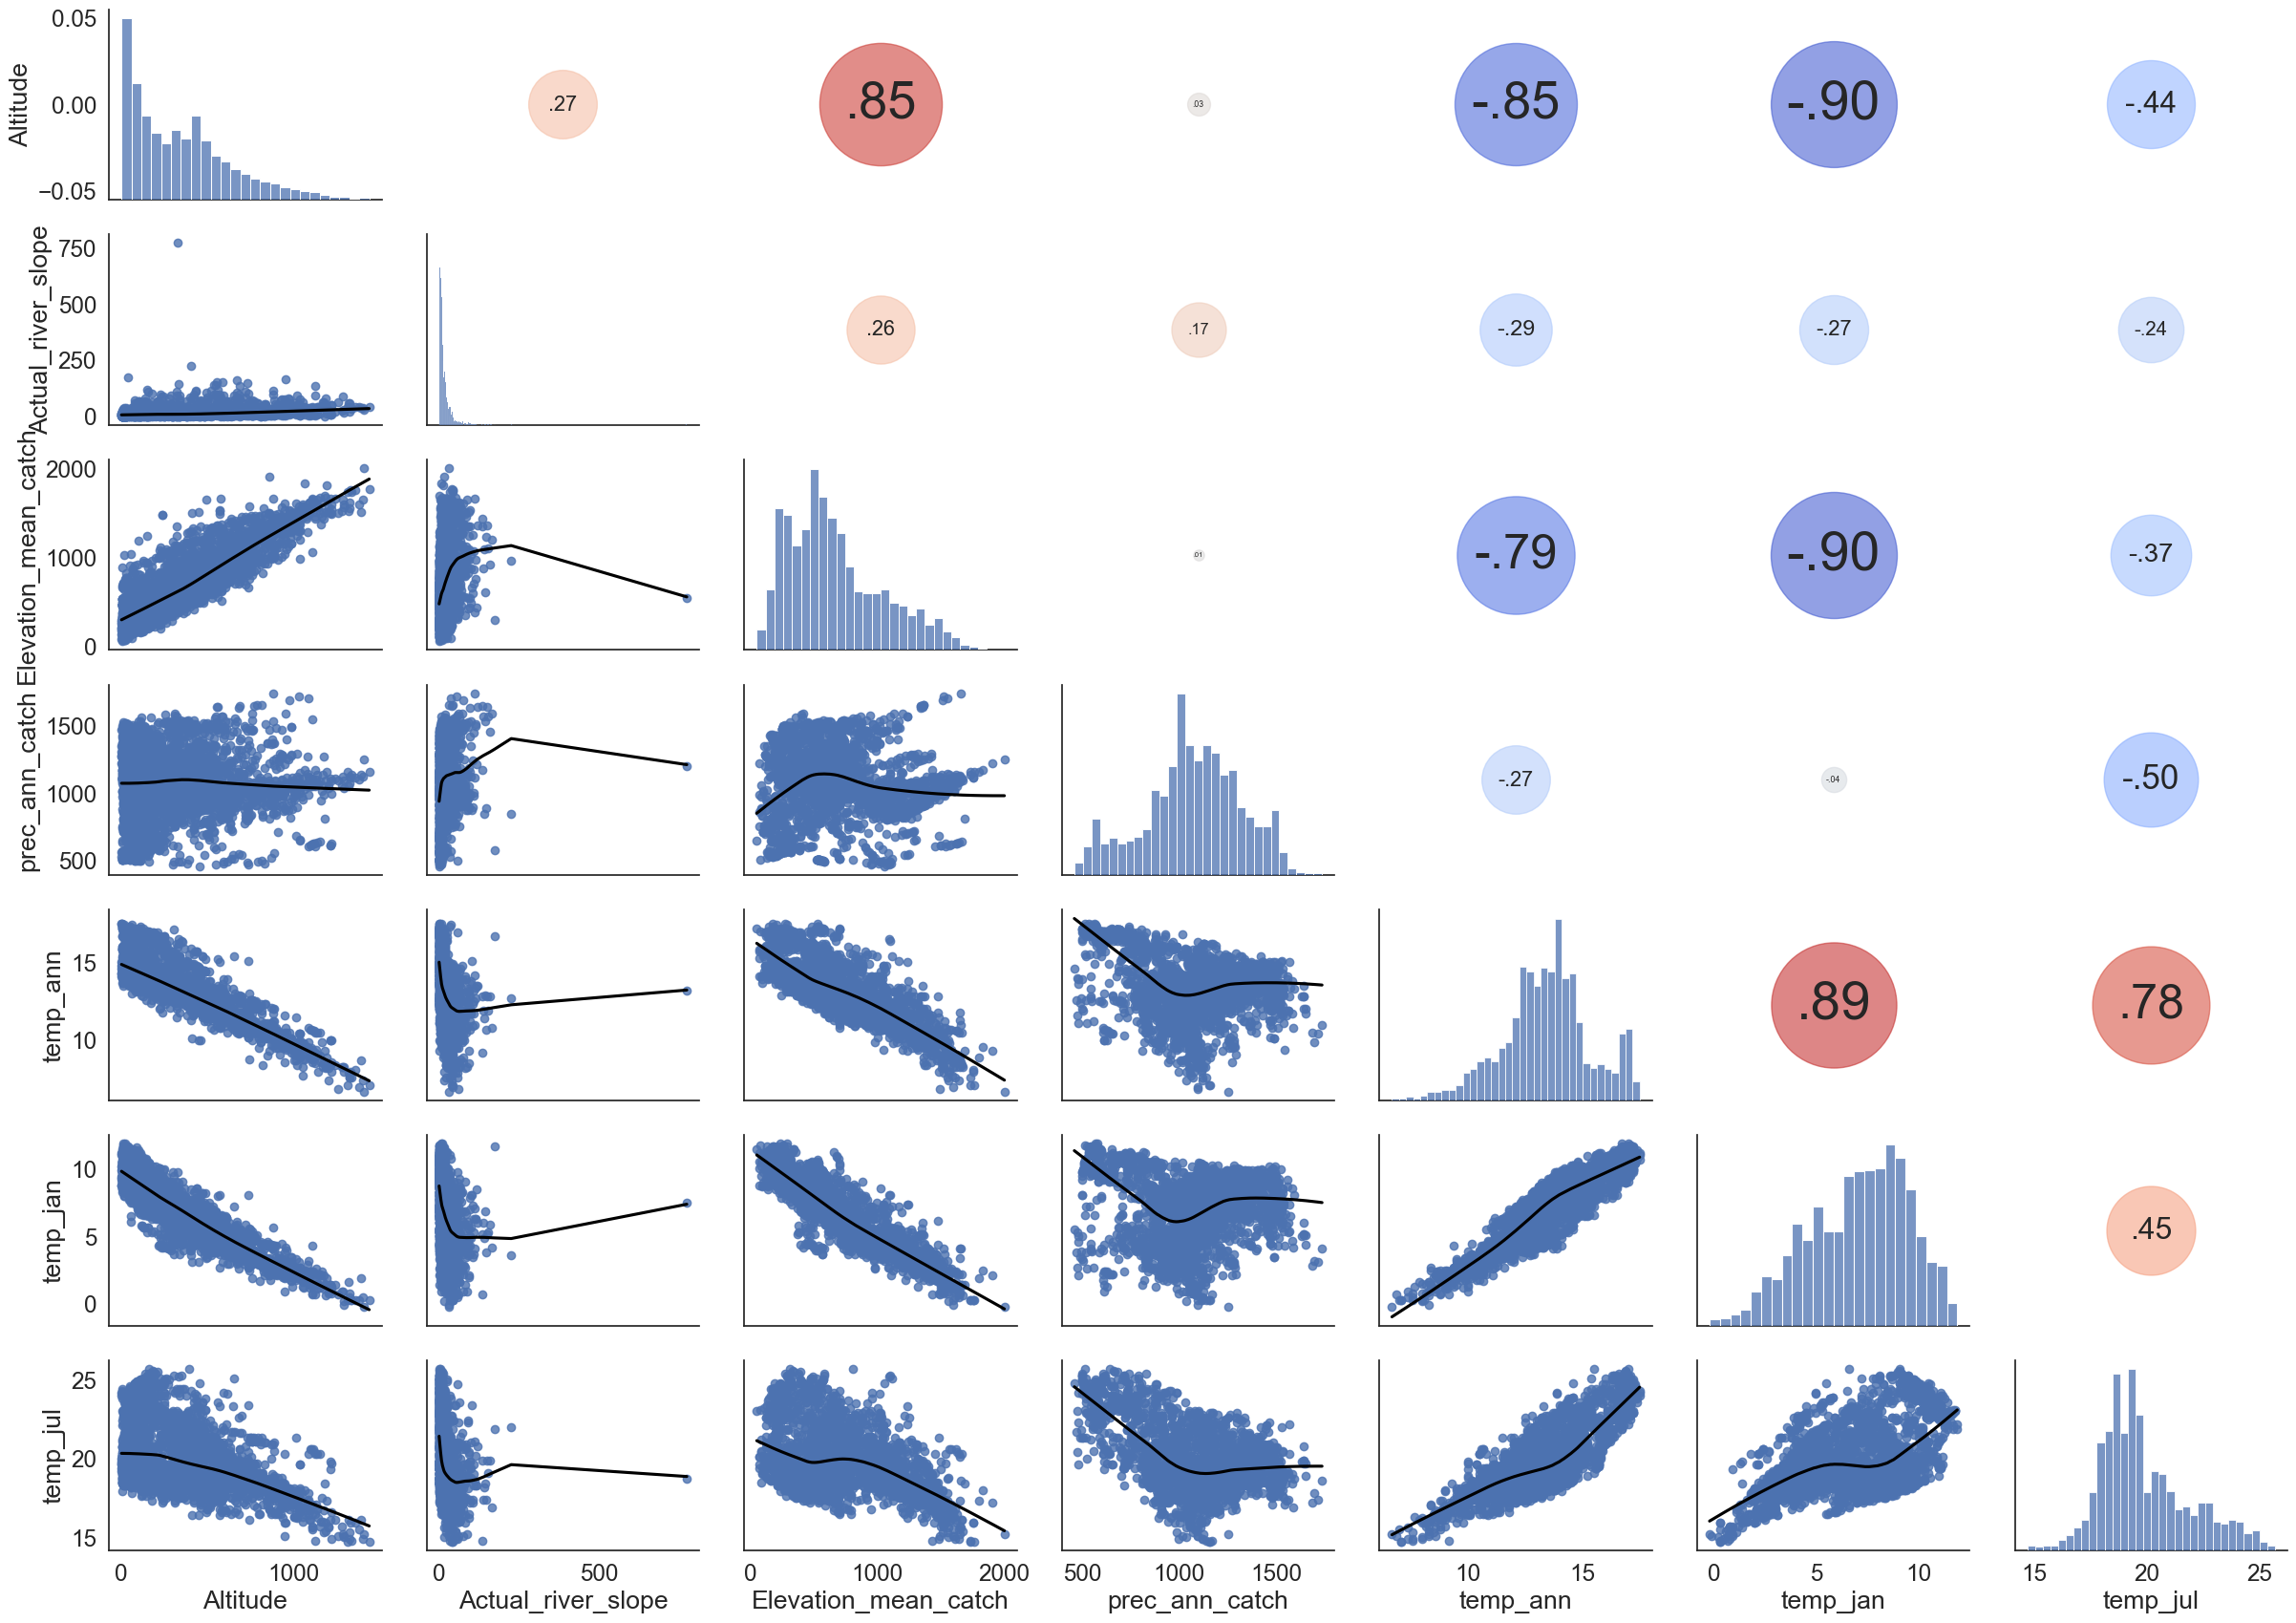

In [21]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

df_env = df_rich_env[["Altitude", "Actual_river_slope","Elevation_mean_catch", "prec_ann_catch","temp_ann","temp_jan","temp_jul"]]

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df_env, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot);

In [22]:
y=df_rich_env["sp_rich"]
x=df_rich_env[["logActual_river_slope", "prec_ann_catch","temp_jan","temp_jul"]]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                sp_rich   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     435.4
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          2.07e-292
Time:                        09:07:38   Log-Likelihood:                -5833.7
No. Observations:                2822   AIC:                         1.168e+04
Df Residuals:                    2817   BIC:                         1.171e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.68